### CLUSTERING AND CUSTOMER SEGMENTATION

In [35]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.set_palette('husl')

In [36]:

data = pd.read_csv('cleaned_marketing.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### DATA WRANGLING

In [37]:
# check for missing values

data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2240 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [39]:
# convert Dt_customer and Income to the right data type

data = data[data['Income'] != " "].reset_index(drop=True)
data['Income'] = pd.to_numeric(data['Income'])
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [40]:
data["years_of_patronage"] = [2025 - x.year for x in data['Dt_Customer']]
data["age"] = 2025 - data["Year_Birth"]

In [41]:
unwanted_cols = ["ID","Year_Birth","Dt_Customer"]
data.drop(columns = unwanted_cols, inplace = True)

In [42]:
encoder = LabelEncoder()
clean_data = data.copy()
cat_cols = ["Education", "Marital_Status"]
for col in cat_cols:
    data[col] = encoder.fit_transform(data[col])

### MODEL FITTING

In [43]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [53]:
columns = ["col1","col2","col3"]
model_pca = PCA(n_components=3, random_state=23)
final_data = model_pca.fit_transform(scaled_data)
final_data = pd.DataFrame(data = final_data, columns=columns)
final_data.head()


,col1,col2,col3
0,3.820226,0.219748,-0.291819
1,-2.434457,-0.226777,-0.317145
2,1.621467,-0.209384,-1.105254
3,-2.565345,-1.632808,0.232799
4,-0.489696,-0.233924,-0.500506


In [54]:
model = KMeans(n_clusters = 4, random_state = 23)
model.fit_predict(X=final_data)
preds = model.labels_

In [55]:
preds

array([0, 1, 0, ..., 3, 0, 3], shape=(2216,), dtype=int32)

In [57]:
clean_data['clusters'] = [f"cluster_{x}" for x in preds]
clean_data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,years_of_patronage,age,clusters
0,Graduation,Single,58138,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,13,68,cluster_0
1,Graduation,Single,46344,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,11,71,cluster_1
2,Graduation,Together,71613,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,12,60,cluster_0
3,Graduation,Together,26646,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,11,41,cluster_1
4,PhD,Married,58293,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,11,44,cluster_1


In [ ]:
import plotly.express as px

px.scatter_3d(data_frame=final_data, x = 'col1', y ='col2', z = 'col3',
color = preds)

<Axes: xlabel='clusters', ylabel='Income'>

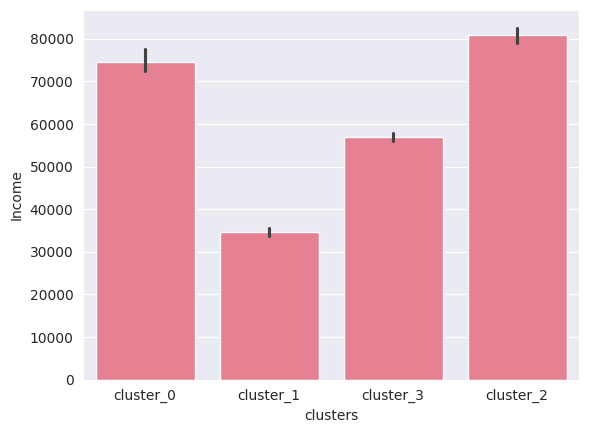

In [59]:
# 
sns.barplot(data=clean_data, x = 'clusters', y = 'Income')

<Axes: xlabel='clusters', ylabel='MntWines'>

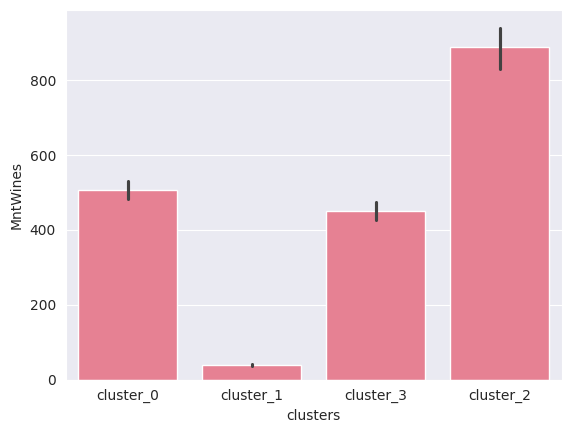

In [62]:
sns.barplot(data=clean_data, x = 'clusters', y = 'MntWines')

<Axes: xlabel='clusters', ylabel='children'>

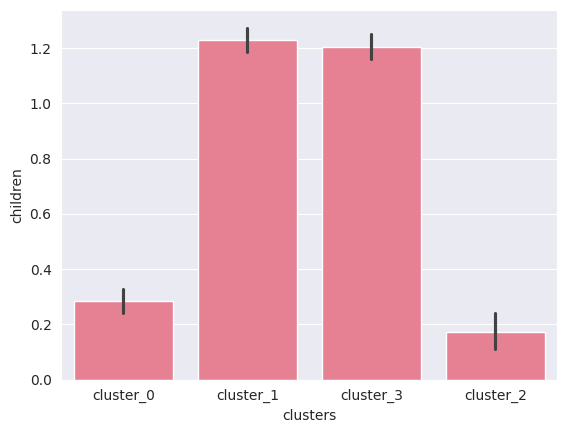

In [64]:
clean_data['children'] = clean_data['Kidhome'] + clean_data["Teenhome"]
sns.barplot(data=clean_data, x = 'clusters', y = 'children')